# Homework 2 (100 Points)

The goal of this homework is to get more practice with pandas and get practice with clustering on various datasets.


## Exercise 1 - (60 points)

This exercise will be using the [Airbnb dataset](http://insideairbnb.com/get-the-data.html) for NYC called `listings.csv`. You can download it directly [here](http://data.insideairbnb.com/united-states/ny/new-york-city/2021-11-02/visualisations/listings.csv)

a) Produce a Heatmap using the Folium package (you can install it using pip) of the mean listing price per location (lattitude and longitude) over the NYC map. (5 points)

Hints:
1. generate a base map of NYC to plot over: default_location=[40.693943, -73.985880] 
2. generate an HTML file named `index.html` - open it in your browser and you'll see the heatmap 



In [3]:
import pandas as pd
!pip install folium
import folium
from folium.plugins import HeatMap

map_Object = folium.Map(location=[40.693943, -73.985880],zoom_start=10)

df = pd.read_csv('listings.csv')
df1 = df.groupby(['latitude','longitude'])
df2 = df.groupby(['latitude','longitude']).price.mean()
lat_long = list(df2.keys())
price = list(df.groupby(['latitude','longitude']).price.mean())


df3 = [[lat_long[x][0],lat_long[x][1],price[x]] for x in range(len(price))]
HeatMap(df3).add_to(map_Object)
map_Object.save('index.html')

b) Normalize the price by subtracting the mean and dividing by the standard deviation. Then reproduce the heatmap from a). Comment on any differences you observe. - (5 points )



In [4]:
Mean_p = df['price'].mean()
STD_p = df['price'].std()

df_price_lat_long = df[['latitude','longitude','price']].values
df_Meanprice_lat_long = [[x[0],x[1],(x[2]-Mean_p)/STD_p] for x in df_price_lat_long]

df1 = pd.DataFrame(df_Meanprice_lat_long,columns=['latitude','longitude','price'])

df2 = df1.groupby(['latitude','longitude']).price.mean()
lat_long = list(df2.keys())
price = list(df1.groupby(['latitude','longitude']).price.mean())

df3 = [[lat_long[x][0],lat_long[x][1],price[x]] for x in range(len(price))]
HeatMap(df3).add_to(map_Object)

map_Object.save('index2.html')

The two heatmaps are slightly different, the blue line bordering the heatmap in b) is more defined and there is an extra light blue circle on the left.

c) Normalize the original price using sklearn's [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) to the interval [0,1]. Then reproduce the Heatmap from a). Comment on any differences you observe.  - (5 points)



In [10]:
from sklearn.preprocessing import MinMaxScaler

data_p = df['price'].values.reshape(-1,1)
sc = MinMaxScaler()
sc.fit(data_p)
new_price = sc.transform(data_p)


df['new_price'] = new_price
df_Inter_price_lat_long = df[['latitude','longitude','new_price']]

df2 = df_Inter_price_lat_long.groupby(['latitude','longitude'])
lat_long = list(df2.new_price.mean().keys())
price = list(df2.new_price.mean())
df3 = [[lat_long[x][0],lat_long[x][1],price[x]] for x in range(len(price))]


HeatMap(df3).add_to(map_Object)
map_Object.save('index3.html')

The heatmap in c) has an even more defined blue border around the heatmap and there are a couple more extra light blue circles.

d) Plot a bar chart of the average price (un-normalized) per room type. Briefly comment on the relation between price and room type. - (2.5 points)


Text(0, 0.5, 'Average price')

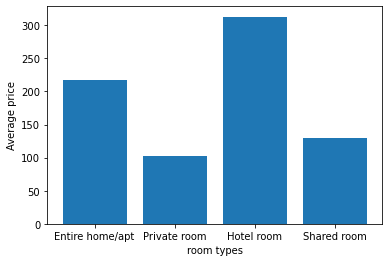

In [11]:
import matplotlib.pyplot as plt

home_apt_p = df[df['room_type']=='Entire home/apt']['price'].mean()
Private_room_p = df[df['room_type']=='Private room']['price'].mean()
Hotel_room_p = df[df['room_type']=='Hotel room']['price'].mean()
Shared_room_p = df[df['room_type']=='Shared room']['price'].mean()

types = ['Entire home/apt', 'Private room', 'Hotel room', 'Shared room']
prices = [home_apt_p,Private_room_p,Hotel_room_p,Shared_room_p]

plt.bar(types, prices)
plt.xlabel('room types')
plt.ylabel('Average price')

Hotel room price is the most expensive, followed by entire home/apt, followed by shared room and then private room.

e) Plot on the NYC map the top 10 most expensive listings - (2.5 points)

In [12]:
top_twenty_exp = df.sort_values(by='price',ascending=False).head(20)[['latitude','longitude','price']]
top_ten_exp = top_twenty_exp.drop_duplicates(subset=['latitude','longitude']).head(10)
map_Object = folium.Map(location=[40.693943, -73.985880],zoom_start=11)
for i in range(len(top_ten_exp)):
    folium.Marker(
    location = [top_ten_exp.iloc[i]['latitude'], top_ten_exp.iloc[i]['longitude']],
    popup = top_ten_exp.iloc[i]['price'],
   ).add_to(map_Object)
map_Object.save('e.html')

f) Plot on the NYC map the top 10 most reviewed listings - (2.5 points)


In [ ]:
top_ten_rev = df.sort_values(by='number_of_reviews',ascending=False).head(10)[['latitude','longitude','number_of_reviews']]
map_Object = folium.Map(location=[40.693943, -73.985880],zoom_start=11)
for i in range(len(top_ten_rev)):
    folium.Marker(
    location = [ten_most_reviewed.iloc[i]['latitude'], top_ten_rev.iloc[i]['longitude']],
    popup = top_ten_rev.iloc[i]['number_of_reviews'],
   ).add_to(map_Object)
map_Object.save('f.html')

g) Plot on the NYC map the top 10 most available listings - (2.5 points)

In [13]:
top_ten_av = df.sort_values(by='availability_365',ascending=False).head(10)[['latitude','longitude','availability_365']]
map_Object = folium.Map(location=[40.693943, -73.985880],zoom_start=11)
for i in range(len(top_ten_av)):
    folium.Marker(
    location=[top_ten_av.iloc[i]['latitude'], top_ten_av.iloc[i]['longitude']],
   ).add_to(map_Object)
map_Object.save('g.html')

h) Using `longitude`, `latitude`, `price`, and `number_of_reviews`, use Kmeans to create 5 clusters. Plot the points on the NYC map in a color corresponding to their cluster. - (10 points)


In [18]:
from folium.plugins import FastMarkerCluster
from sklearn.cluster import KMeans
map_Object = folium.Map(location=[40.693943, -73.985880],zoom_start=12)
df_price_lat_long_numOfrev = df[['latitude','longitude','price','number_of_reviews']].values
kmeans = KMeans(n_clusters=5)
kmeans.fit(df_price_lat_long_numOfre)
y_km = kmeans.fit_predict(df_price_lat_long_numOfrev)
df_lat_long_cluster = df[['latitude','longitude']]
df_lat_long_cluster_one = df_lat_long_cluster.copy()
df_lat_long_cluster_one['cluster'] = y_km
cl0 = df_lat_long_cluster_one[df_lat_long_cluster_one['cluster']==0]
cl1 = df_lat_long_cluster_one[df_lat_long_cluster_one['cluster']==1]
cl2 = df_lat_long_cluster_one[df_lat_long_cluster_one['cluster']==2]
cl3 = df_lat_long_cluster_one[df_lat_long_cluster_one['cluster']==3]
cl4 = df_lat_long_cluster_one[df_lat_long_cluster_one['cluster']==4]


for i in range(len(cl0)):
    folium.CircleMarker(
    location = [cl0.iloc[i]['latitude'], cl0.iloc[i]['longitude']],
    filler = True,
    radius = 2,
    color = 'black'
   ).add_to(map_Object)

for i in range(len(cl1)):
    folium.CircleMarker(
    location = [cl1.iloc[i]['latitude'], cl1.iloc[i]['longitude']],
    filler = True,
    radius = 2,
    color = 'blue'
   ).add_to(map_Object)

for i in range(len(cl2)):
    folium.CircleMarker(
    location = [cl2.iloc[i]['latitude'], cl2.iloc[i]['longitude']],
    filler = True,
    radius = 2,
    color = 'green'
   ).add_to(map_Object)
    
for i in range(len(cl3)):
    folium.CircleMarker(
    location = [cl3.iloc[i]['latitude'], cl3.iloc[i]['longitude']],
    filler = True,
    radius = 2,
    color = 'yellow'
   ).add_to(map_Object)

for i in range(len(cl4)):
    folium.CircleMarker(
    location=[cl4.iloc[i]['latitude'], cl4.iloc[i]['longitude']],
    filler=True,
    radius=2,
    color='red'
   ).add_to(map_Object)
map_Object.save('h.html')

i) You should see points in the same cluster all over the map - briefly explain why that is. - (2.5 points)

The data isn't normalized and the number of clusters might be incorrect

j) How many clusters would you recommend using instead of 5? Display and interpret either the silhouette scores or the elbow method. - (5 points)

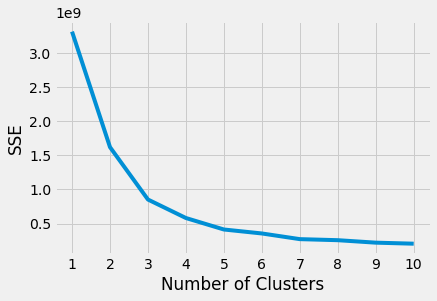

In [20]:
kmeans_kwargs = {     
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

ss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df_price_lat_long_numOfrev)
    ss.append(kmeans.inertia_)
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), ss)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

As we increment k with each iteration, SSE continues to decrease and as more centroids are added, the distance between each point and its closest centroid decreases. Now, we can choose the point in which the SSE starts to curve and that is 3.

k) Would you recommend normalizing the price and number of reviews? Briefly explain why. - (5 points)

Yes, because the ranges are different. When doing k-means, the attributed number of reviews will influence the result more due to its larger value. Thus, it is better to use normalization.

l) For all listings of type `Shared room`, plot the dendrogram of the hierarchical clustering generated from `longitude`, `latitude`, and `price`. - (5 points)


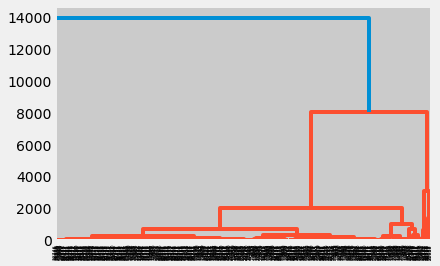

In [21]:
from scipy.cluster.hierarchy import dendrogram, linkage

df1 = df[df['room_type']=='Shared room']

df2 = df1[['latitude','longitude','price']]

Z = linkage(df2, 'ward')
dendrogram(Z,labels=df2.index,leaf_rotation=90)
plt.show()

m) briefly comment on what you observe from the structure of the dendrogram.  - (2.5 points)

All the data points would go into one general category indicated by the blue line. 

n) Normalize the `price` as in b) and repeat l) - (5 points)

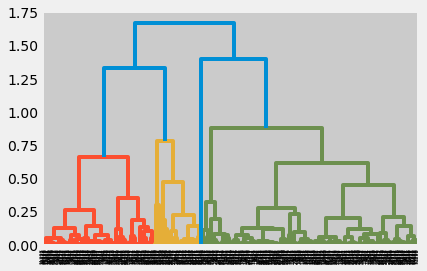

In [22]:
df3 = df1[['latitude','longitude','new_price']]
Z = linkage(df3, 'ward')
dendrogram(Z,labels=df3.index,leaf_rotation=90)
plt.show()

## Exercise 2 (40 points)

This exercise will be using the [mnist dataset](http://yann.lecun.com/exdb/mnist/).

a) Using Kmeans, cluster the images using 10 clusters and plot the centroid of each cluster. - (10 points)

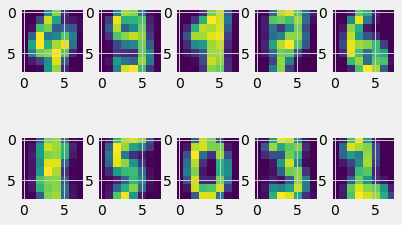

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import load_digits

mnist = load_digits()

df = mnist['images']
df1 = df.copy()
df2 = df1.reshape(1797,64)


kmeans = KMeans(n_clusters=10)
kmeans.fit(df2)
cen = kmeans.cluster_centers_
cen = cen.reshape(10,8,8)
fig,a = plt.subplots(2,5)
num = 0
for x in range(2):
    for y in range(5):
        a[x][y].imshow(cen[num])
        num+=1

b) what is the disagreement distance between the clustering you created above and the clustering created by the labels attached to each image? Briefly explain what this number means in this context. - (10 points)

In [27]:
y_km = kmeans.fit_predict(df2)

label = list(mnist['target'])
cr = list(y_km)
total = 0
for x in range(len(label)):
    for y in range(x+1,len(label)):
        if label[x] == label[y] and cr[x] != cr[y]:
            total+=1
        elif cr[x] == cr[y] and label[x] != label[y]:
            total+=1
total

99053

In [ ]:
It is the number of combinations that the predicted clusterings disagree with the label, this could tell us to some extend how accurate the clusterings created are

c) Download the CIFAR-10 dataset [here](https://www.cs.toronto.edu/~kriz/cifar.html). Open `batch_1` by following the documentation on the web page. Plot a random image from the dataset. - (10 points)

10000


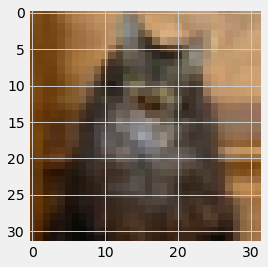

In [31]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

import numpy as np
y = unpickle('data_batch_1')
img = y[b'data'][26].reshape(3,1024)
img = np.transpose(img)
img = img.reshape(32,32,3)
plt.imshow(img)
print(x[b'data'].shape[0])

d) This image is 32 x 32 pixels and each pixel is a 3-dimensional object of RGB (Red, Green, Blue) intensities. Using the same image as in c), produce an image that only uses 4 colors (the 4 centroids of the clusters obtained by clustering the image itself using Kmeans). - (10 points)

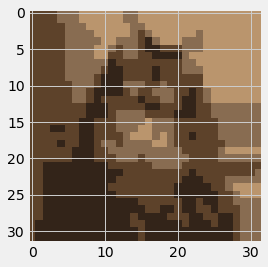

In [36]:
n_colors = 4
sample_img = img
sample_img = sample_img.reshape(32*32,3)
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(sample_img)
labels = kmeans.predict(sample_img)
identified_pal = np.array(kmeans.cluster_centers_).astype(int)
recolored_img = np.copy(sample_img)
for index in range(len(recolored_img)):
    recolored_img[index] = identified_pal[labels[index]]
recolored_img = recolored_img.reshape(32,32,3)
plt.imshow(recolored_img)